In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [22]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# export

from exp.nb_01 import *

def get_data():
    path = datasets.download_data(MNIST_URL, ext='.gz')
    with gzip.open(path, 'rb') as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')
    return map(tensor, (x_train, y_train, x_valid, y_valid))

def normalize(x, m, s): return (x-m)/s

In [5]:
x_train, y_train, x_valid, y_valid = get_data()

In [6]:
train_mean, train_std = x_train.mean(), x_train.std()
train_mean, train_std

(tensor(0.1304), tensor(0.3073))

In [7]:
x_train = normalize(x_train, train_mean, train_std)
x_valid = normalize(x_valid, train_mean, train_std)

In [8]:
train_mean, train_std = x_train.mean(), x_train.std()
train_mean, train_std

(tensor(3.0614e-05), tensor(1.))

In [9]:
#export
def test_near_zero(a, tol=1e-3): assert a.abs() < tol, f"Near zero: {a}"

In [10]:
test_near_zero(x_train.mean())
test_near_zero(1-x_train.std())

In [55]:
n,m = x_train.shape
c = y_train.max()+1
n,m,c

(50000, 784, tensor(10))

____

#### Basic architecture

In [12]:
from torch.nn import init

In [15]:
def show_arr(arr):
    plt.figure(figsize=(7,7))
    plt.imshow(arr, cmap='gray')
    plt.show()
    
def hist_arr(arr):
    farr = torch.flatten(arr)
    plt.hist(farr, bins=20)
    plt.axvline(farr.mean(), color='k', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(farr.mean()* 1.2, max_ylim*0.9, f"Mean: {farr.mean():.2f}; SD: {farr.std():.2f}")
    plt.show()
    
def check_arr(arr):
    show_arr(arr)
    hist_arr(arr)

def gauss_array(mu=0, sigma=1, x=100, y=100):
    x, y = np.meshgrid(np.linspace(-1,1,x), np.linspace(-1,1,y))
    d = np.sqrt(x*x+y*y)
    g = np.exp(-((d-mu)**2 / (2.0 * sigma**2)))
    return g    
    
def lin(x, w, b):
    return x@w + b

def relu(x):
    return x.clamp_min(0.)

In [14]:
nh = 50

In [91]:
np.min(_w1)

0.3678794411714422

In [92]:
np.max(_w1)

0.999790959745749

In [78]:
_w1 = gauss_array(mu=0, sigma=1, x=m, y=nh)
w1 = torch.from_numpy(_w1).float().t()
b1 = torch.zeros(nh)
_w2 = gauss_array(mu=0, sigma=1, x=1, y=nh)
w2 = torch.from_numpy(_w2).float().t()
b2 = torch.zeros(1)

In [181]:
w1 = torch.randn(m, nh)/math.sqrt(m)
b1 = torch.zeros(nh)
w2 = torch.randn(nh,1)/math.sqrt(nh)
b2 = torch.zeros(1)

In [188]:
w1b = torch.zeros(m, nh)
init.kaiming_normal_(w1b, mode='fan_out')

tensor([[ 0.0204, -0.0333,  0.0846,  ...,  0.0256,  0.0696, -0.0213],
        [ 0.0226,  0.0838,  0.0820,  ..., -0.0155, -0.0078,  0.0673],
        [-0.0241, -0.0016,  0.0358,  ...,  0.0643,  0.0610, -0.0891],
        ...,
        [-0.0309, -0.0257,  0.0217,  ..., -0.0342,  0.0367, -0.0553],
        [-0.0462,  0.0012,  0.0400,  ...,  0.0443, -0.0273, -0.0809],
        [-0.0736,  0.0286, -0.0063,  ...,  0.0166, -0.0447,  0.0518]])

In [79]:
w1.shape

torch.Size([784, 50])

In [80]:
x_valid.shape

torch.Size([10000, 784])

In [81]:
t = relu(lin(x_valid, w1, b1))

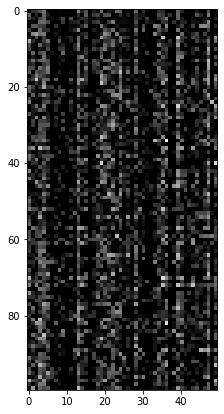

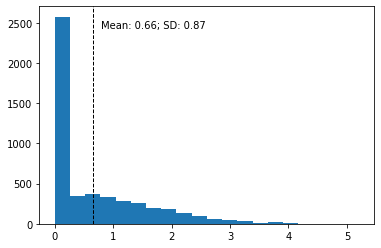

In [190]:
check_arr(t[0:100])

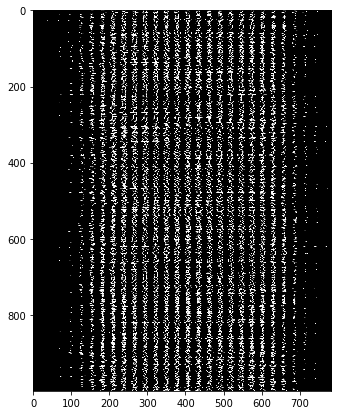

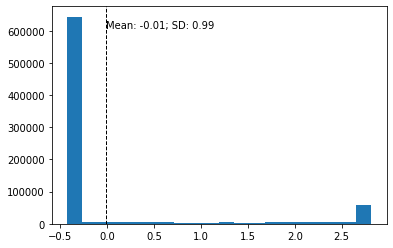

In [96]:
check_arr(x_valid[0:1000])

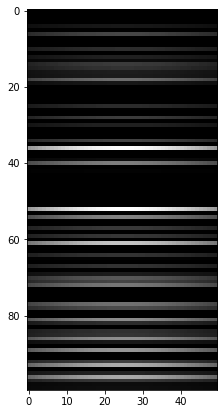

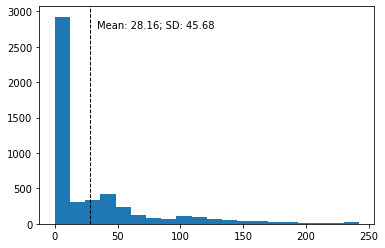

In [97]:
check_arr(t[0:100])

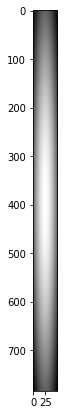

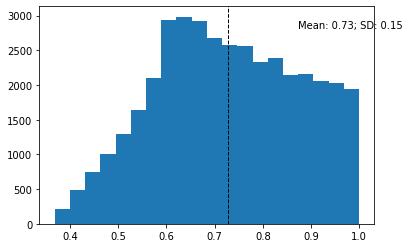

In [94]:
check_arr(w1)